# Plotting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("petroff10")

### Using plt for quick plots

- Matplotlib is the most widely used plotting library in the ecosystem of python. In the above cel we loaded matplotlib and the relevant libraries. 

- The easiest way to use `matplotlib` is via pyplot, which allows you to plot 1D and 2D data. Here is a simple example:

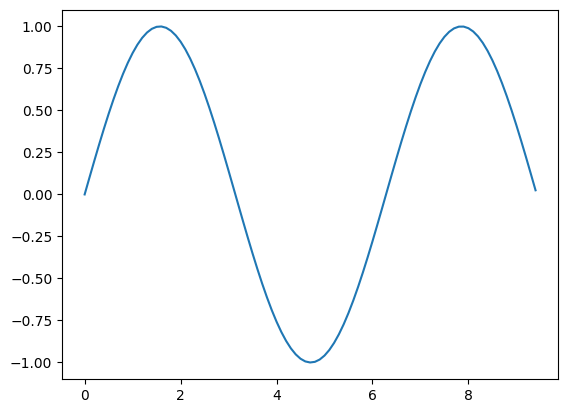

In [2]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)

### Using fig, ax objects for subplots and more

- For customizing plots it is more convenient to define **fig** and **ax** objects.
- ax and fig can be manipulated using their methods
- One can then use ax object to make veriety of subplots then use fig to save the entire figure as one pdf. 

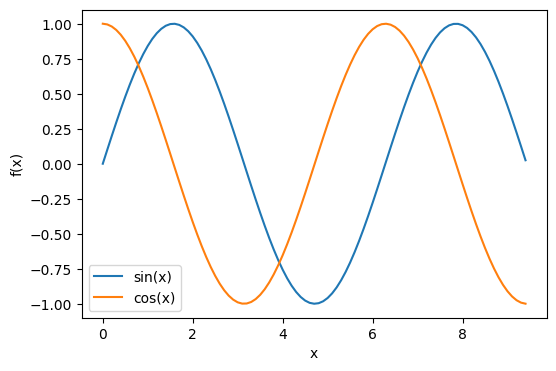

In [4]:
fig, ax = plt.subplots(figsize=(6,4))

x = np.arange(0, 3 * np.pi, 0.1)
y1 = np.sin(x)
y2 = np.cos(x)

# Plot the points using matplotlib
ax.plot(x, y1, label='sin(x)')
ax.plot(x, y2, label='cos(x)')

# Specify labels
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.legend()

#fig.savefig("myfig.pdf")

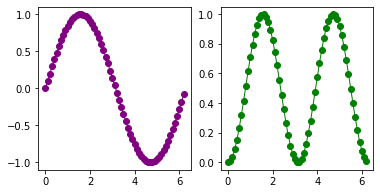

In [6]:
t = np.arange(0.0,  2*np.pi, 0.1) # create x values
s = np.sin(t)                     # create y values

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(6,3))          

ax[0].plot(t, s, color='purple', lw=2.0)  # plot on subplot-1
ax[1].plot(t, s**2, color='green',  lw=2.0)  # plot  on subplot-2

#fig.savefig('sd.png')             # save the figure

In [ ]:
x = range(11)
y = range(11)

fig, ax = plt.subplots(nrows=2, ncols=3,
                       sharex=True, sharey=True)

for row in ax:
    for col in row:
        col.plot(x, y)
        
plt.show()

### Histogram

In [ ]:
# Make up some random data
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# Plot 1D histogram of the data
plt.hist(x, bins=40, density=True);

### Bar plot

In [ ]:
# input data
means = [1, 2, 3]
stddevs = [0.2, 0.4, 0.5]
bar_labels = ['bar 1', 'bar 2', 'bar 3']


# plot bars
x_pos = list(range(len(bar_labels)))
plt.bar(x_pos, means, yerr=stddevs)

plt.show()

### Scatter

In [ ]:
x = 1 + 3 * np.random.randn(10000)

y = 2 + 5 * np.random.randn(10000)

plt.scatter(x,y)

### Plotting in 2D

To make 2D plots we need to generate 2D grid $(x,y)$ of points and pass it to our function $f(x,y)$

$$f(x,y) = sin(x) \cdot cos(x) \,\,\,$$

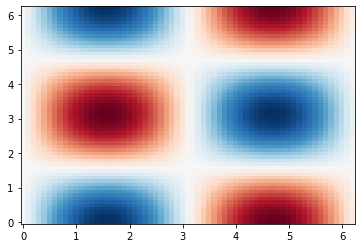

In [7]:
x = np.arange(0.0,  2*np.pi, 0.1)   # create x values
y = np.arange(0.0,  2*np.pi, 0.1)   # create y values

X, Y = np.meshgrid(x,y)             # tunring 1D array into 2D grids of x and y values

Z = np.sin(X) * np.cos(Y)           # feed 2D grids to our 2D function f(x,y)

fig, ax = plt.subplots()            # Create fig and ax objects
ax.pcolor(X, Y, Z,cmap='RdBu')                  # plot 

# try also ax.contour, ax.contourf

## Matplotlib Widgets

Suppose we would like to explore how the variation of parameter $\lambda$ affects the following function of a standing wave:

$$f(x) = sin (\omega \cdot x +p)$$

- Make a python-function which creates a plot as a function of a parameter(s) of interest.

- Add an interactive widget on top to vary the parameter.

In [9]:
from ipywidgets import widgets, interact, interactive

In [10]:
def wave(phase=0, freq=0.5):          
    
    x  = np.linspace(0,10,1000)
    y  = np.sin(freq*x+phase)
        
    plt.plot(x, y)
    plt.show()

In [11]:
interactive(wave, phase=(0, 2*np.pi), freq = (0.1, 5))  

interactive(children=(FloatSlider(value=0.0, description='phase', max=6.283185307179586), FloatSlider(value=0.…

### Interactive plots


- [Plotly](https://plotly.com/python/) is large multi-language  interactive graphing library that covers Python/Julia/R. 

- [Plotly-express](https://plotly.com/python-api-reference/plotly.express.html) is a high level library for quick visualizations whihc is similiar to seaborn vs matploltib in its philosophy

- Complex interacting plots can be created using plotly graph objects. 
- You can use **chatGPT** to help you get started and to customize your plots

In [ ]:
import plotly.graph_objects as go 

# Makeup some data
x = np.outer(np.linspace(-2, 2, 30), np.ones(30)) 
y = x.copy().T 
z = np.cos(x ** 2 + y ** 2) 

# Create surface plot
surface = go.Surface(x=x, y=y, z=z)

# Create fig using surface plot
fig = go.Figure(data=[surface]) 

# Customize fig
fig.update_traces(contours_z=dict( 
    show=True, usecolormap=True, 
    highlightcolor="limegreen", 
    project_z=True)) 
  
fig.show() 

### Animations

In [ ]:
import matplotlib.animation as animation
from IPython.display import HTML

# Generate random walk data
positions = np.cumsum(np.random.randn(100, 50, 2), axis=0)

def animate():
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xlim(-20, 20)
    ax.set_ylim(-20, 20)
    scatter = ax.scatter([], [])
    
    def update(frame):
        scatter.set_offsets(positions[frame])
        return scatter,
    
    ani = animation.FuncAnimation(fig, update, frames=100, interval=50, blit=True)
    plt.close(fig)
    return HTML(ani.to_jshtml())

# Run animation
animate()

## Additional resoruces. 

- Matplotlib has a huge scientific user base. This means that you can always find a good working template of any kind of visualization which you want to make. With basic understanding of matplotlib and some solid googling skills you can go very far. Here are some additional resources that you may find helpful

- [Matplotlib Examples](https://matplotlib.org/stable/gallery/index.html)

- [The Python Graph Gallery](https://python-graph-gallery.com/)

- Once you understand the basics of matplotlib objects you can use **ChatGPT** or other LLM to build sophisticated plots. Give it a try!